<a href="https://colab.research.google.com/github/Siwon-Kim/CodeBlue/blob/main/siwon/KoBERT_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers
!pip install torch

In [ ]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# 증상 데이터와 응급 정도 레이블
data = [
    ["10분 정도 한 후에 괜찮아짐", [0., 1., 0., 0., 0.]],
    ["밥을 먹다가 아랫입술이 경련이 난 것처럼 떨린다", [0., 0., 0., 1., 0.]],
    ["월요일 체력단련 후 명치가 아프면서 밤새 동안 구토, 구역질", [0., 0., 1., 0., 0.]],
    ["교정하고 있는 상태", [1., 0., 0., 0., 0.]],
    ["운동을 하다가 심장이 갑자기 아프다", [0., 0., 1., 0., 0.]],
    ["증상은 1주일 정도 계속", [0., 0., 1., 0., 0.]],
    ["가끔씩 어지럽거나 빈혈도 있음", [0., 1., 0., 0., 0.]],
    ["혈압약을 먹고 있음", [1., 0., 0., 0., 0.]],
    ["아스팔트에서 넘어져 살이 까지는 찰과상", [0., 1., 0., 0., 0.]],
    ["다음날 상처 부위에 진물이 흐름", [1., 0., 0., 0., 0.]],
    ["지금은 상처 주변이 빨갛게 변함", [0., 1., 0., 0., 0.]],
    ["상처에서 열감이 느껴짐", [0., 1., 0., 0., 0.]],
    ["담석증으로 인해 복강경 수술 후 [0., 0., 1., 0., 0.]일 뒤 퇴원", [0., 0., 1., 0., 0.]],
    ["역류성 식도염 증상과 구역감이 지속", [0., 0., 1., 0., 0.]],
    ["식사 후 구역감이 계속 생김", [0., 0., 1., 0., 0.]],
    ["역류성 식도염처럼 목에 이물감이 계속 남아있음", [0., 1., 0., 0., 0.]],
    ["4일 전 부터 잇몸이 너무 아프고 시림", [0., 1., 0., 0., 0.]],
    ["출혈이 반복되며 소염 진통제를 먹어도 효과가 없음", [0., 0., 0., 1., 0.]],
    ["잇몸이 헐고 열이 계속 남", [0., 1., 0., 0., 0.]],
    ["바람이 불면 상처부위랑 얼굴이 아프고 식사를 제대로 못함", [0., 0., 1., 0., 0.]],
    ["자고 일어났을 때 목과 어깨가 뻐근하고 찌릿한 느낌을 받음", [1., 0., 0., 0., 0.]],
    ["오른쪽 귀 밑부터 쇄골 윗 부분 근육까지 아픔", [0., 1., 0., 0., 0.]],
    ["교통사고 난 느낌일 정도로 아픔", [0., 0., 1., 0., 0.]],
    ["얼굴 광대 아랫부분부터 입 주변 부분이 저림", [0., 1., 0., 0., 0.]],
    ["통증은 없으며, 지릿지릿한 느낌이고 증상이 한번 발생하면 보통 [0., 0., 1., 0., 0.]~5시간 지속", [0., 1., 0., 0., 0.]],
    ["정신과에 불안장애 진단을 받고 현재 약을 복용중", [0., 0., 1., 0., 0.]],
    ["최근 들어 과호흡이 심해짐", [0., 0., 1., 0., 0.]],
    ["호흡곤란 느낌이 이어지며 심장이 답답하고, 약을 복용 후에도 지속", [0., 0., 1., 0., 0.]],
    ["일상생활이 힘든 정도", [0., 0., 1., 0., 0.]],
    ["회사 근무 간 불안과 긴장, 한숨이 반복", [1., 0., 0., 0., 0.]],
    ["본인의 직책에 대한 과도한 불안감", [0., 1., 0., 0., 0.]],
    ["본인의 적응 능력에 대한 자책과 울적함을 느끼며, 과한 음주", [0., 1., 0., 0., 0.]],
    ["긴장 완화를 위해 본인에게 맞지 않는 커피를 지속 섭취", [1., 0., 0., 0., 0.]],
    ["피를 뽑은 후 바늘 구멍 주변이 모기물린 것 처럼 부어오름", [1., 0., 0., 0., 0.]],
    ["간지럽고 1.~2달간 상처가 아물지 않음", [0., 1., 0., 0., 0.]],
    ["이전에 극 민감성 아토피를 앓았던 적이 있음", [0., 1., 0., 0., 0.]],
    ["6개월이 지난 지금은 주사부위만 트고 가끔 가려움", [1., 0., 0., 0., 0.]],
    ["목을 오른쪽으로 꺾으면 가슴 명치 쪽이 쑤심", [0., 1., 0., 0., 0.]],
    ["수면 중 기침 때문에 자다가 숨 넘어갈 것 같음", [0., 1., 0., 0., 0.]],
    ["명치 왼쪽 부분이 쑤시는 느낌이 듬", [0., 1., 0., 0., 0.]],
    ["정수리 오른쪽 뾰루지 부분에 바늘로 찌르는 듯한 심한 통증을 느낌", [0., 1., 0., 0., 0.]],
    ["앞으로 휘청거려서 쓰러질 정도로 중심을 못잡음", [0., 0., 1., 0., 0.]],
    ["심장이 따끔 거리고 호흡이 힘듬", [0., 0., 1., 0., 0.]],
    ["의식이 없으며, 자가 호흡을 하지 못함", [0., 0., 0., 0., 1.]],
    ["팔에 심한 출혈이 있으며, 맥박이 떨어짐", [0., 0., 0., 0., 1.]],
    ["의식이 없으며 심박이 불안함", [0., 0., 0., 0., 1.]],
    ["환자는 경기를 일으키고 있음", [0., 0., 0., 1., 0.]],
    ["공황장애 병력을 갖고 있음", [0., 0., 1., 0., 0.]],
    ["체온이 낮고 나른함", [1., 0., 0., 0., 0.]],
    ["종아리가 심하게 부어있음", [0., 1., 0., 0., 0.]],
    ["숨을 쉴 때 갑자기 흉부에 통증을 느낌", [0., 1., 0., 0., 0.]],
    ["마른 기침이 나오며 숨을 쉬기 힘들어 합니다.", [0., 0., 1., 0., 0.]],
    ["평소에 사과 알레르기가 있으며, 눈과 입술이 부어오름", [0., 1., 0., 0., 0.]],
    ["원인 미상의 알레르기 반응으로 목 부분이 심하게 부었음", [0., 0., 1., 0., 0.]],
    ["동공이 확장되었으며 식은 땀을 흘림", [0., 0., 1., 0., 0.]],
    ["목이 심하게 부어 숨을 쉬는데 고통을 호소하고 있음", [0., 0., 1., 0., 0.]],
    ["맥박이 떨어지고 있으며 의식이 없음", [0., 0., 0., 0., 1.]],
    ["심한 두통과 고열 증세를 보임", [0., 1., 0., 0., 0.]],
    ["몸이 건조하며 탈수 증상이 있음", [0., 1., 0., 0., 0.]],
    ["정신착란 증세가 있으며 사물을 인지 못함", [0., 0., 0., 1., 0.]],
    ["강한 뇌진탕으로 인하여 의식이 없음", [0., 0., 0., 0., 1.]],
    ["엉덩이부근에 심한 찰과상이 있음", [0., 1., 0., 0., 0.]],
    ["소실된 의식과 기억 상실, 혼란상태를 보여요.", [0., 0., 0., 1., 0.]],
    ["환자가 오늘 아침에 발열이 높았다. 또한 환자가 혈압이 높았다.", [0., 1., 0., 0., 0.]],
    ["두통으로 인해 치매 증상 발생", [0., 0., 1., 0., 0.]],
    ["두통때문에 혼절함", [0., 0., 0., 1., 0.]],
    ["두통, 치통이 있으며 오른쪽 팔목에 통증을 호소한다.", [0., 1., 0., 0., 0.]],
    ["기억 상실상태이며, 가끔 가슴통증도 동반한다", [0., 1., 0., 0., 0.]],
    ["기운이 없으며 손발이 계속 저리고, 청각이 손실 된듯 하다", [0., 0., 1., 0., 0.]],
    ["피를 계속 토하고, 각혈이 지속되다보니 혈압이 높아져서 쓰러짐", [0., 0., 0., 0., 1.]],
    ["심부전의 징후인 가슴 통증, 사지 부종, 코막힘이 있어요.", [0., 0., 0., 1., 0.]],
    ["발작으로 인한 청각 손실, 시야 손실 발생했습니다.", [0., 0., 0., 1., 0.]],
    ["호흡곤란과 호흡음, 흉부 압박감을 겪고 있습니다.", [0., 0., 0., 1., 0.]],
    ["고열과 목의 부종 사지 마비로 도움이 필요해 보입니다.", [0., 0., 0., 0., 1.]],
    ["팔과 다리 부분에 1.도 화상을 입었습니다.", [0., 1., 0., 0., 0.]],
    ["전신에 힘이 없으며 몸을 제대로 가누지를 못함", [0., 1., 0., 0., 0.]],
    ["혈압이 높고 경련 증세가 있음", [0., 0., 1., 0., 0.]],
    ["사물을 인지하지 못하고 상황판단이 불가능함", [0., 0., 1., 0., 0.]],
    ["엉덩이에서 작은 출혈이 있음", [1., 0., 0., 0., 0.]],
    ["등에 멍자국이 있음", [1., 0., 0., 0., 0.]],
    ["얼굴에 붉은 반점이 있음", [1., 0., 0., 0., 0.]],
    ["안면부에 심한 찰과상이 있으며 출혈이 심합니다", [0., 0., 1., 0., 0.]],
    ["기침에 피를 동반함", [0., 0., 1., 0., 0.]],
    ["어깨 부근의 탈골이 의심됨.", [1., 0., 0., 0., 0.]],
    ["빈혈끼가 있으며 시야가 보이지 않음", [0., 0., 1., 0., 0.]],
    ["앞가슴을 심하게 누르는 듯한 느낌을 받음", [0., 0., 1., 0., 0.]],
    ["환자의 전신에 자해 자국이 있음", [0., 0., 1., 0., 0.]],
    ["다소 심한 뇌진탕으로 인해 의식이 희미함", [0., 0., 0., 1., 0.]],
    ["목 부근에 자해의 흔적이 있다", [0., 0., 0., 1., 0.]],
    ["코피 음식 섭취 곤란, 가려운 발진이 관찰되어요.", [0., 1., 0., 0., 0.]],
    ["피토 하고, 각혈이 점점 심해져서 즉각적인 응급 처치가 필요함", [0., 0., 0., 0., 1.]],
    ["오전에 발작을 일으켰으며 기운이 없어보이고, 호흡곤란이 있엇다", [0., 0., 0., 1., 0.]],
    ["빈혈과 혈액 흘림, 황달 증상을 확인했습니다.", [0., 0., 1., 0., 0.]],
    ["경련, 목의 부종, 의식 변화로 급한 조치가 필요해보입니다.", [0., 0., 0., 0., 1.]],
    ["환자는 객혈과 피토를 겪고 있습니다.", [0., 0., 0., 0., 1.]],
    ["기침을 자주하며 목이 심하게 부어오름", [1., 0., 0., 0., 0.]],
    ["무릎에 심한 출혈이 있습니다", [0., 0., 1., 0., 0.]],
    ["전신에 격통을 느끼고 있음", [0., 0., 0., 1., 0.]],
    ["심한 발열과 함께 방금 있었던 일을 기억하지 못하는 등의 증세를 보임", [0., 0., 0., 1., 0.]],
    ["자가 호흡이 불가능하며 빠른 이송이 필요", [0., 0., 0., 0., 1.]],
]

In [7]:
# KoBERT Tokenizer 가져오기

from kobert_tokenizer import KoBERTTokenizer
MODEL_NAME = "skt/kobert-base-v1"
tokenizer = KoBERTTokenizer.from_pretrained(MODEL_NAME)
tokenizer.encode("한국어 모델을 공유합니다.")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


[2, 4958, 6855, 2046, 7088, 1050, 7843, 54, 3]

In [26]:
import torch
from torch.utils.data import Dataset, DataLoader

class SymptomsDataset(Dataset):
    # 데이터셋을 전 처리해주는 함수
    def __init__(self, dataset, tokenizer: KoBERTTokenizer, max_token_len: int = 128):
        self.tokenizer = tokenizer
        self.dataset = dataset
        self.max_token_len = max_token_len

    def __len__(self):
        # 데이터의 길이를 반환
        return len(self.dataset)

    def __getitem__(self, i):
        # i번째 데이터 샘플을 선택할 때 즉, dataset [i]를 쓸 때 해당 값을 인코딩하여 반환
        sentence, labels = self.dataset[i]
     
        encoding = self.tokenizer.encode_plus(
            sentence,
            add_special_tokens=True, # 토큰의 시작점에 [CLS], 마지막에 [SEP] 토큰을 붙임
            max_length=self.max_token_len,
            return_token_type_ids=False, # 두 개의 시퀀스 입력으로 활용할 때 0과 1로 문장의 토큰 값을 분리
            padding="max_length",
            truncation=True,
            return_attention_mask=True, # 패딩 된 부분을 알려주기 위해 사용되는 mask
            return_tensors='pt',
        )

        return dict(
            sentence = sentence,
            input_ids = encoding["input_ids"].flatten(),
            attention_mask = encoding["attention_mask"].flatten(),
            labels = torch.FloatTensor(labels)
        )

In [27]:
# DataLoader 만들기
from torch.utils.data import DataLoader

dataset = SymptomsDataset(data, tokenizer)
sample_item = dataset[0]
sample_item.keys()

dict_keys(['sentence', 'input_ids', 'attention_mask', 'labels'])

In [28]:
print(sample_item["sentence"])
print(sample_item["input_ids"])
print(sample_item["labels"])

10분 정도 한 후에 괜찮아짐
tensor([   2,  533, 6416, 4099, 4955, 5176, 6896, 1100, 6797, 7353,    3,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1])
tensor([0., 1., 0., 0., 0.])


In [62]:
# 데이터 로더에 데이터셋을 담고 next(iter.. 를 사용하여 순회 가능한 데이터를 만들어 줄 수 있음
sample_batch = next(iter(DataLoader(dataset, batch_size = 32, num_workers = 2 )))  
sample_batch["input_ids"].shape, sample_batch["attention_mask"].shape

(torch.Size([32, 128]), torch.Size([32, 128]))

In [51]:
# KoBERT 모델 가져오기
from transformers import BertModel

bert_model = BertModel.from_pretrained(MODEL_NAME, return_dict=True)

output = bert_model(sample_batch["input_ids"], sample_batch["attention_mask"])
print(output)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.3325,  0.2008,  0.3704,  ...,  0.1645,  0.1307, -0.0030],
         [ 0.0516, -0.0757,  0.2106,  ..., -0.4891,  0.1830,  0.0679],
         [ 0.2650,  0.2030,  0.2846,  ..., -0.2778,  0.0859,  0.2151],
         ...,
         [ 0.5475, -0.2161,  0.3187,  ..., -0.4186, -0.0971,  0.1318],
         [ 0.5475, -0.2161,  0.3187,  ..., -0.4186, -0.0971,  0.1318],
         [ 0.5475, -0.2161,  0.3187,  ..., -0.4186, -0.0971,  0.1318]],

        [[-0.0328,  0.1522, -0.0218,  ...,  0.2984, -0.0140,  0.0380],
         [ 0.2765,  0.1485,  0.2409,  ...,  0.1926, -0.0997,  0.2817],
         [ 0.2248,  0.1489,  0.6675,  ...,  0.2665, -0.1769, -0.2365],
         ...,
         [-0.0352, -0.2256, -0.1007,  ...,  0.1269, -0.3402,  0.0732],
         [-0.0352, -0.2256, -0.1007,  ...,  0.1269, -0.3402,  0.0732],
         [-0.0352, -0.2256, -0.1007,  ...,  0.1269, -0.3402,  0.0732]],

        [[-0.0010, -0.0845, -0.0983,  ...,  0.2410,  

In [31]:
bert_model.config.hidden_size

768

In [ ]:
# PyTorch Lightning으로 Dataset 튜닝
!pip install pytorch_lightning

In [15]:
import pytorch_lightning as pl
from torchmetrics.functional import accuracy,f1_score,auroc
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger

In [52]:
# DataLoader와 Dataset 지정 => 해당 DataLoader에 dataset과 batch_size, num_workers를 지정
class SymptomsDataModule(pl.LightningDataModule):
    def __init__(self, train_df, test_df, tokenizer, batch_size = 32, max_token_len = 128):
        super().__init__()
        self.batch_size = batch_size
        self.train_df = train_df
        self.test_df = test_df
        self.tokenizer = tokenizer
        self.max_token_len = max_token_len

    def setup(self, stage = None):
        self.train_dataset = SymptomsDataset(
            self.train_df,
            self.tokenizer,
            self.max_token_len
        )

        self.test_dataset = SymptomsDataset(
            self.test_df,
            self.tokenizer,
            self.max_token_len
        )

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size = self.batch_size,
            shuffle = True,
            num_workers = 2
        )

    def val_dataloader(self):
        return DataLoader(
            self.batch_size,
            batch_size = self.batch_size,
            num_workers = 2
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size = self.batch_size,
            num_workers = 2
        )

In [53]:
# train_dataloader & test_dataloader 만들기

N_EPOCHS = 5
BATCH_SIZE = 32
MAX_TOKEN_COUNT = 128

data_module = SymptomsDataModule(
    data, # for training
    data, # for testing
    tokenizer,
    batch_size = BATCH_SIZE
)
print(data_module)

In [54]:
# PyTorch Lightning에서 trainer와 모델의 상호작용을 위해 lightning module을 만들어준다.

from transformers import AdamW, get_linear_schedule_with_warmup
import torch.nn as nn

LABEL_COLUMNS = ["1", "2", "3", "4", "5"]

class SymptomsSentencesTagger(pl.LightningModule):
    def __init__(self, n_classes: int, n_training_steps=None, n_warmup_steps=None):
        super().__init__()
        self.bert = bert_model
        self.classifier = nn.Linear(self.bert.config.hidden_size, n_classes)
        self.n_training_steps = n_training_steps
        self.n_warmup_steps = n_warmup_steps
        self.criterion = nn.BCELoss()

    # 모델의 추론 결과를 제공하고 싶을 때 사용
    def forward(self, input_ids, attention_mask, labels=None):
        output = self.bert(input_ids, attention_mask = attention_mask)
        output = self.classifier(output.last_hidden_state[:, 0, :])
        output = torch.sigmoid(output)
        loss = 0
        if labels is not None:
            loss = self.criterion(output, labels)
        return loss, output

    def training_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["labels"]
        loss,outputs = self(input_ids, attention_mask, labels)
        self.log("val_loss", loss, prog_bar = True, logger = True)
        return {"loss": loss, "predictions": outputs, "labels": labels}

    def test_step(self, batch, batch_idx):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["labels"]
        loss,outputs = self(input_ids, attention_mask, labels)
        self.log("val_loss", loss, prog_bar =True, logger = True)
        return loss

    def on_train_epoch_end(self, outputs):
        labels = []
        predictions = []
        for output in outputs:
            for out_labels in output["labels"].detach().cpu():
                labels.append(out_labels)
            for out_predictions in output["predictions"].detach().cpu():
                predictions.append(out_predictions)

        labels = torch.stack(labels).int()
        predictions = torch.stack(predictions)

        for i, name in enumerate(LABEL_COLUMNS):
            class_roc_auc = auroc(predictions[:,i],labels[:,i])
            self.logger.experiment.add_scalar(f"{name}_roc_auc/Train", class_roc_auc, self.current_epoch)
    
    # optimizer & scheduler 정의
    def configure_optimizers(self):
        optimizer = AdamW(self.parameters(), lr= 2e-5)

        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps= self.n_warmup_steps,
            num_training_steps = self.n_training_steps
        )

        return dict(
            optimizer=optimizer,
            lr_scheduler = dict(
            scheduler = scheduler,
            interval='step'
        )
    )

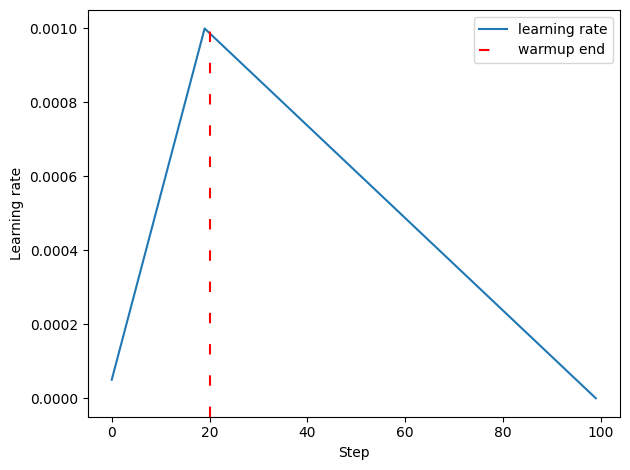

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

dummy_model = nn.Linear(2,1)

optimizer = AdamW(params=dummy_model.parameters(),lr=0.001)

warmup_steps = 20
total_training_steps = 100

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = warmup_steps,
    num_training_steps = total_training_steps
)

learning_rate_history = []

for step in range(total_training_steps):
    optimizer.step()
    scheduler.step()
    learning_rate_history.append(optimizer.param_groups[0]['lr'])

plt.plot(learning_rate_history, label="learning rate")
plt.axvline(x=warmup_steps, color="red", linestyle=(0, (5, 10)), label="warmup end")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Learning rate")
plt.tight_layout();

In [56]:
steps_per_epoch = len(data)
total_training_steps = steps_per_epoch * N_EPOCHS 

In [57]:
warmup_steps = total_training_steps // 5
warmup_steps, total_training_steps

(100, 500)

In [58]:
model = SymptomsSentencesTagger(
    n_classes=len(LABEL_COLUMNS),
    n_warmup_steps = warmup_steps,
    n_training_steps = total_training_steps
)

In [59]:
# 체크포인트

checkpoint_callback = ModelCheckpoint(
  dirpath="checkpoints",
  filename="best-checkpoint",
  save_top_k=1,
  verbose=True,
  monitor="val_loss",
  mode="min"
)

In [60]:
logger = TensorBoardLogger("lightning_logs", name="symptoms-sentences")

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)

In [61]:
trainer = pl.Trainer(
  logger=logger,
  callbacks=[checkpoint_callback, early_stopping_callback],
  max_epochs=N_EPOCHS,
  accelerator="gpu", 
)

trainer.fit(model, data_module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type      | Params
-----------------------------------------
0 | bert       | BertModel | 92.2 M
1 | classifier | Linear    | 3.8 K 
2 | criterion  | BCELoss   | 0     
-----------------------------------------
92.2 M    Trainable params
0         Non-trainable params
92.2 M    Total params
368.763   Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

RuntimeError: ignored

In [ ]:
# test set 넣기
trained_model = SymptomsSentencesTagger.load_from_checkpoint(
    trainer.checkpoint_callback.best_model_path,
    n_classes=len(LABEL_COLUMNS)
)

trained_model.eval()
trained_model.freeze()

test_comment = "얼굴에 심한 찰과상이 있어서 출혈이 있음"

encoding = tokenizer.encode_plus(
  test_comment,
  add_special_tokens=True,
  max_length=128,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)
_, test_prediction = trained_model(encoding["input_ids"], encoding["attention_mask"])
test_prediction = test_prediction.flatten().numpy()
for label, prediction in zip(LABEL_COLUMNS, test_prediction):
  print(f"{label}: {prediction}")